# Micro Credit Defaulter Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
MF=pd.read_csv('MicroFinance.csv')
MF.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [2]:
MF.shape

(209593, 37)

Column 'label' is the target attribute/variable in the dataset.

In [3]:
MF.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

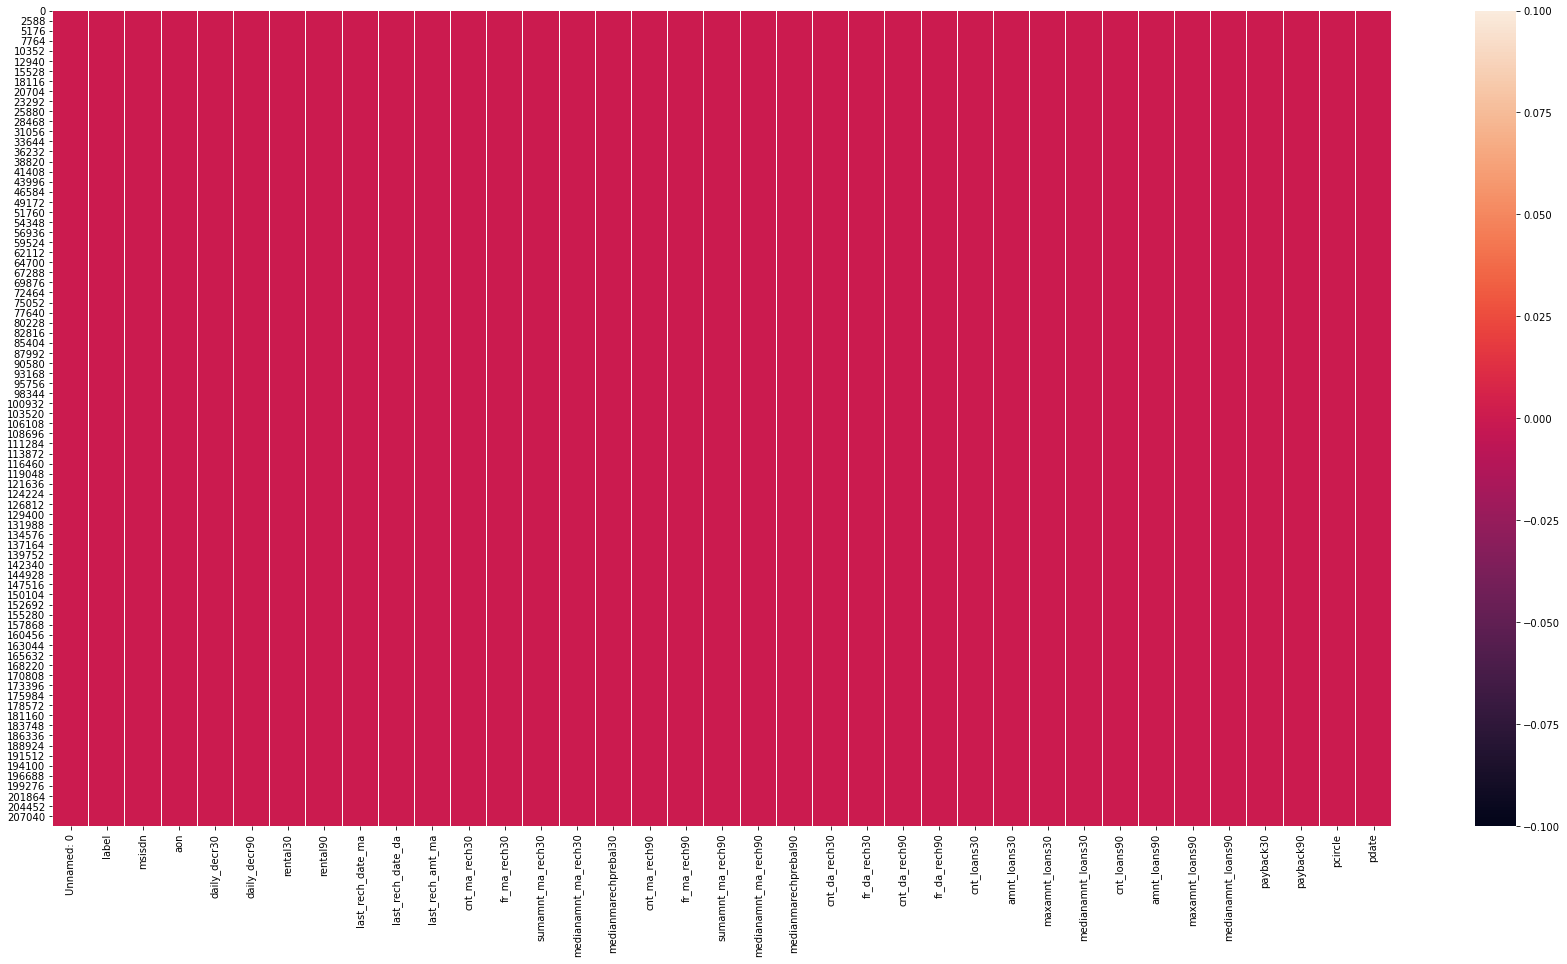

In [4]:
plt.figure(figsize=(30,15))
sns.heatmap(MF.isnull())

In [5]:
MF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
MF.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In [7]:
MF2= MF._get_numeric_data()
MF2[MF2<0]=0

In [8]:
MF2.skew()

Unnamed: 0              2.854282e-15
label                  -2.270254e+00
aon                     1.039295e+01
daily_decr30            3.946238e+00
daily_decr90            4.252572e+00
rental30                4.549979e+00
rental90                4.458345e+00
last_rech_date_ma       1.479097e+01
last_rech_date_da       1.481486e+01
last_rech_amt_ma        3.781149e+00
cnt_ma_rech30           3.283842e+00
fr_ma_rech30            1.477283e+01
sumamnt_ma_rech30       6.386787e+00
medianamnt_ma_rech30    3.512324e+00
medianmarechprebal30    1.477988e+01
cnt_ma_rech90           3.425254e+00
fr_ma_rech90            2.285423e+00
sumamnt_ma_rech90       4.897950e+00
medianamnt_ma_rech90    3.752706e+00
medianmarechprebal90    4.507906e+01
cnt_da_rech30           1.781836e+01
fr_da_rech30            1.477643e+01
cnt_da_rech90           2.726728e+01
fr_da_rech90            2.898808e+01
cnt_loans30             2.713421e+00
amnt_loans30            2.975719e+00
maxamnt_loans30         1.765805e+01
m

In [9]:
sns.distplot(MF['daily_decr30'])


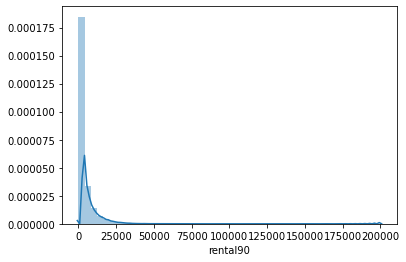

In [10]:
sns.distplot(MF['rental90'])

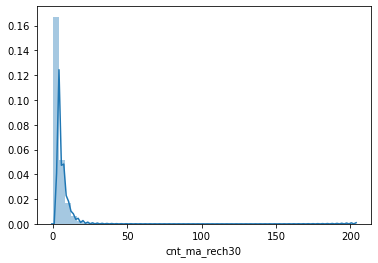

In [11]:
sns.distplot(MF['cnt_ma_rech30'])

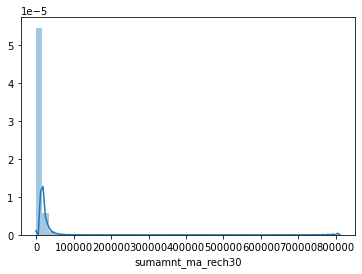

In [12]:
sns.distplot(MF['sumamnt_ma_rech30'])

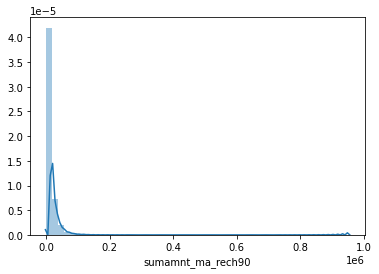

In [13]:
sns.distplot(MF['sumamnt_ma_rech90'])

In [14]:
sns.distplot(MF['payback30'])

In [15]:
sns.distplot(MF['payback90'])

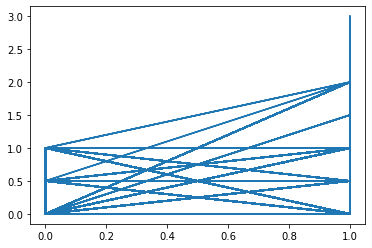

In [16]:
plt.plot(MF['label'],MF['medianamnt_loans90'], label='medianamnt_loans90')

In [17]:
plt.plot(MF['label'],MF['maxamnt_loans90'], label='maxamnt_loans90')

In [23]:
MF2.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD947B7C0>,
      dtype=object)

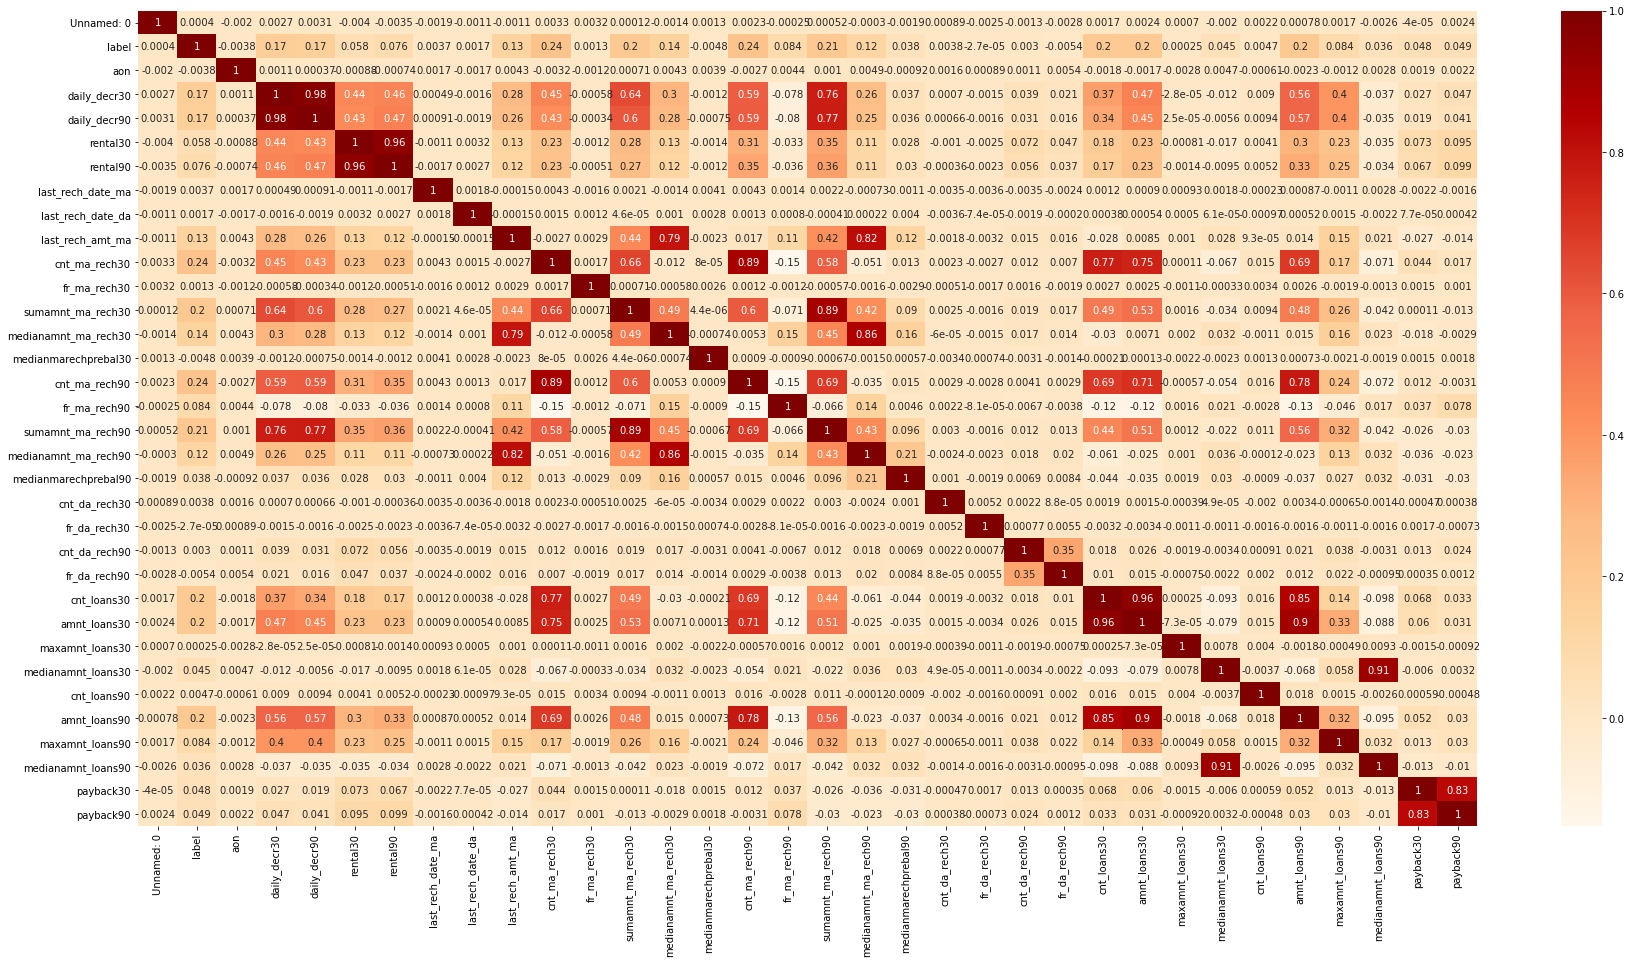

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(MF2.corr(),cmap='OrRd',annot=True)

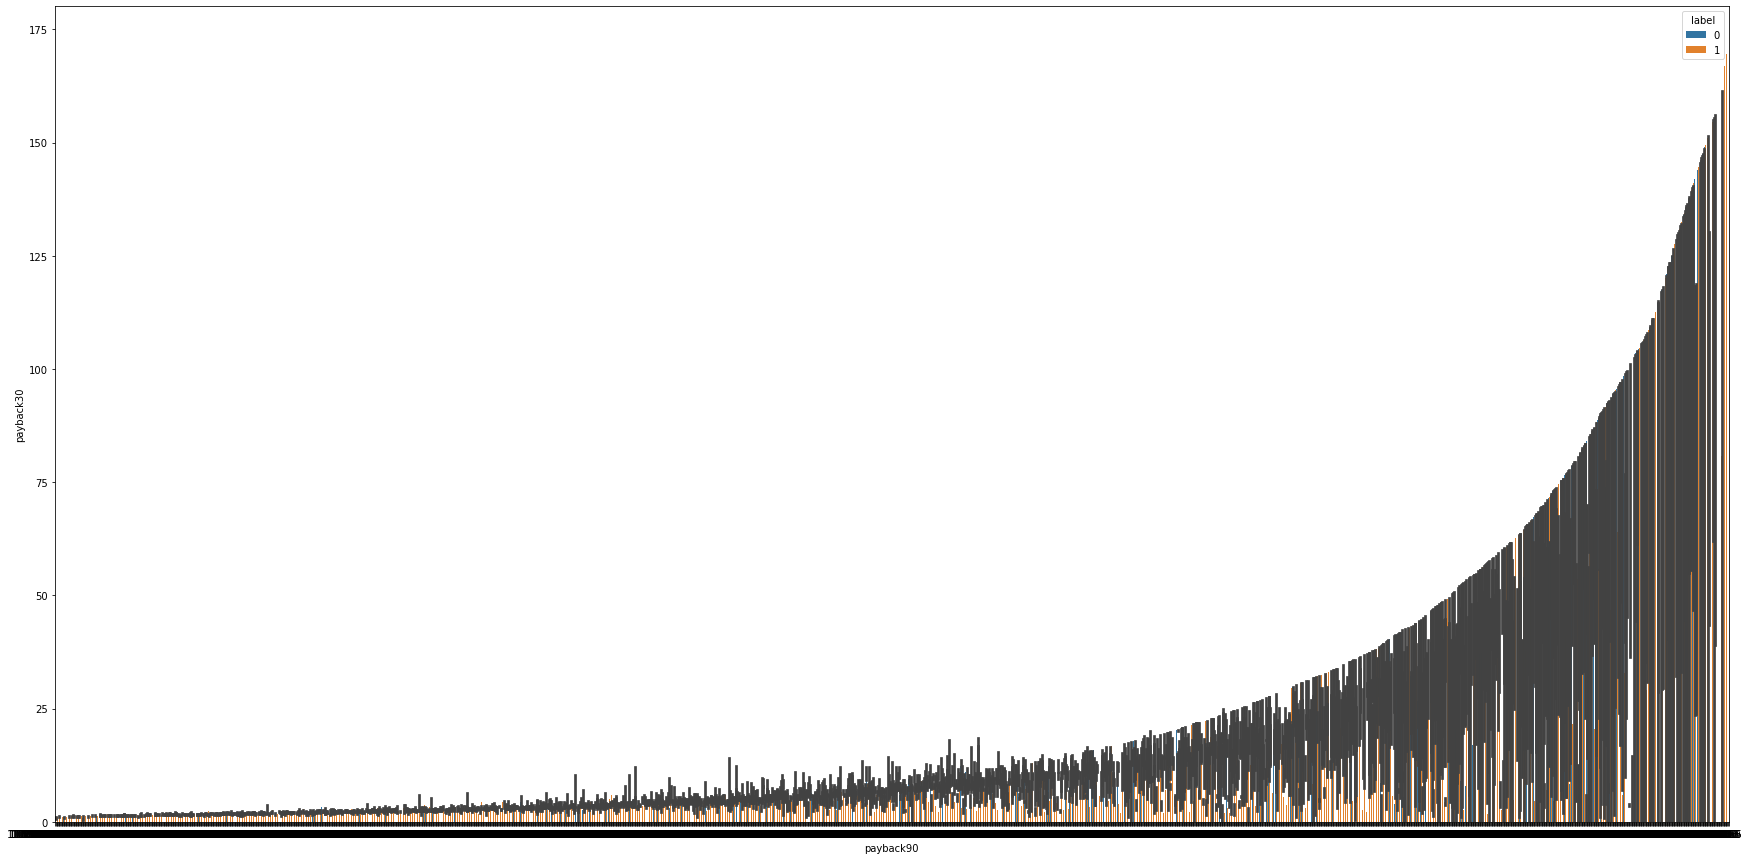

In [21]:
plt.figure(figsize=(30,15))
sns.barplot(x=MF['payback90'],y=MF['payback30'],hue=MF['label'])

In [22]:
plt.figure(figsize=(30,15))
sns.barplot(x=MF['medianamnt_ma_rech30'],y=MF['medianamnt_ma_rech90'],hue=MF['label'])

In [25]:
credit=MF2.drop(columns=['Unnamed: 0'])
credit.shape

(209593, 33)

In [26]:
x=credit.iloc[:,1:34]
y=credit.iloc[:,0:1]
print(x.shape)
print(y.shape)

(209593, 32)
(209593, 1)


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [28]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,shuffle=True)

In [ ]:
model=[DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy_score:',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    m.scores = cross_val_score(m,x,y,cv=5)
    print('CV_score:', m.scores.mean(),m.scores.std())
    print('*****************************************************************')

Score of DecisionTreeClassifier() is: 0.9994811360139318
Accuracy_score: 0.8665760156492283
[[ 2586  2608]
 [ 2985 33740]]
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      5194
           1       0.93      0.92      0.92     36725

    accuracy                           0.87     41919
   macro avg       0.70      0.71      0.70     41919
weighted avg       0.87      0.87      0.87     41919

CV_score: 0.863955384222634 0.0008670631258226792
*****************************************************************
Score of LogisticRegression() is: 0.8760809666376421
Accuracy_score: 0.8773587156182161
[[  123  5071]
 [   70 36655]]
              precision    recall  f1-score   support

           0       0.64      0.02      0.05      5194
           1       0.88      1.00      0.93     36725

    accuracy                           0.88     41919
   macro avg       0.76      0.51      0.49     41919
weighted avg       0.85      0.88      0.82

RandomForestClassifier gives the best score among all the algorithms used for model building.